In [1]:
%pylab inline
import scipy.integrate as integrate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
# solve_ivp functions

# returns vector of dx/dt, dAcx/dt and dAx/dt in that order

def derivs(t, y, nu, xAs):
    x0 = y[0]               # position of hub
    N = int(0.5*(len(y)-1))   # of lattice sites
    Acx = y[1:N+1]          # bound complex on lattice
    Ax = y[-N:]             # free complex on lattice
    
    dxcdt = integrate.trapz(-(x0-xAs)*Acx, x=xAs)  # force equation
    binding = exp(-0.5*(x0-xAs)**2)*Ax 
    burnt = nu*Acx

    dAcxdt = (binding - burnt)   # complex chemistry
    dAxdt = -binding            # free substrate chemistry
    
    return array( [dxcdt] + list(dAcxdt) + list(dAxdt))     # maybe a better way to put them all together

In [3]:
# define event as having gone to x = 20.0
def event(t, y):
    x0 = y[0]
        
    return 20.0-x0

event.direction = 0        
event.terminal = True     # stop solver if event satisfied

In [35]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

# parameters - just 2 params in this model
tf = 400.0

a0s = logspace(-2,1,43)
nus = logspace(-2,1,43)
a0_n = len(a0s)
nu_n = len(nus)

# define domain and lattice
Lmax = 30.0
Lmin = -10.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xAs = linspace(Lmin, Lmax, Nx)

print(a0s,a0_n,nus,nu_n)

[ 0.01        0.01178769  0.01389495  0.01637894  0.01930698  0.02275846
  0.02682696  0.03162278  0.03727594  0.04393971  0.05179475  0.06105402
  0.07196857  0.08483429  0.1         0.11787686  0.13894955  0.16378937
  0.19306977  0.22758459  0.26826958  0.31622777  0.37275937  0.43939706
  0.51794747  0.61054023  0.71968567  0.8483429   1.          1.17876863
  1.38949549  1.63789371  1.93069773  2.27584593  2.6826958   3.16227766
  3.72759372  4.39397056  5.17947468  6.1054023   7.19685673  8.48342898
 10.        ] 43 [ 0.01        0.01178769  0.01389495  0.01637894  0.01930698  0.02275846
  0.02682696  0.03162278  0.03727594  0.04393971  0.05179475  0.06105402
  0.07196857  0.08483429  0.1         0.11787686  0.13894955  0.16378937
  0.19306977  0.22758459  0.26826958  0.31622777  0.37275937  0.43939706
  0.51794747  0.61054023  0.71968567  0.8483429   1.          1.17876863
  1.38949549  1.63789371  1.93069773  2.27584593  2.6826958   3.16227766
  3.72759372  4.39397056  5.179474

In [36]:

#I.C.

vs = []  # record final speed and burn rate
burnt = []
for a0 in a0s:
    
    A0x = zeros(Nx)
    A0x[xAs > 0.0] = a0
    # A0x = a0*ones(Nx) + 0.1*a0*2.0*(0.5-random.random(Nx))

    # iterate over params
    vtmp = []
    btmp = []
    for nu in nus:
        print(a0, nu)

        x0 = 0.0
        Ax = 1.0*A0x
        Acx = zeros(Nx)

        # initial conditions for all the equations, y0
        y0 = array([x0] + list(Acx) + list(Ax))

        sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xAs), (0., tf), y0, events=[event], method='BDF')

        speed = derivs(sol.t[-1], sol.y[:,-1], nu, xAs)[0]  #dx/dt
        vtmp.append(speed)
        
        Acxf = sol.y[1:1+Nx,-1]  # final amount of complex
        btot = integrate.trapz(nu*Acxf, x=xAs)    # total rate of burnt at final time 
        btmp.append(btot)
        
    vs.append(vtmp)
    burnt.append(btmp)
vs = array(vs)
burnt = array(burnt)

0.01 0.01
0.01 0.011787686347935873
0.01 0.013894954943731374
0.01 0.016378937069540637
0.01 0.019306977288832496
0.01 0.022758459260747887
0.01 0.02682695795279726
0.01 0.03162277660168379
0.01 0.0372759372031494
0.01 0.043939705607607904
0.01 0.0517947467923121
0.01 0.061054022965853265
0.01 0.07196856730011521
0.01 0.08483428982440717
0.01 0.1
0.01 0.11787686347935872
0.01 0.13894954943731375
0.01 0.1637893706954064
0.01 0.19306977288832497
0.01 0.22758459260747876
0.01 0.2682695795279725
0.01 0.31622776601683794
0.01 0.372759372031494
0.01 0.43939705607607904
0.01 0.517947467923121
0.01 0.6105402296585326
0.01 0.7196856730011517
0.01 0.8483428982440717
0.01 1.0
0.01 1.1787686347935866
0.01 1.3894954943731375
0.01 1.637893706954063
0.01 1.9306977288832496
0.01 2.2758459260747887
0.01 2.6826957952797246
0.01 3.1622776601683795
0.01 3.727593720314938
0.01 4.39397056076079
0.01 5.179474679231207
0.01 6.105402296585327
0.01 7.196856730011514
0.01 8.483428982440717
0.01 10.0
0.0117876863

0.022758459260747887 0.08483428982440717
0.022758459260747887 0.1
0.022758459260747887 0.11787686347935872
0.022758459260747887 0.13894954943731375
0.022758459260747887 0.1637893706954064
0.022758459260747887 0.19306977288832497
0.022758459260747887 0.22758459260747876
0.022758459260747887 0.2682695795279725
0.022758459260747887 0.31622776601683794
0.022758459260747887 0.372759372031494
0.022758459260747887 0.43939705607607904
0.022758459260747887 0.517947467923121
0.022758459260747887 0.6105402296585326
0.022758459260747887 0.7196856730011517
0.022758459260747887 0.8483428982440717
0.022758459260747887 1.0
0.022758459260747887 1.1787686347935866
0.022758459260747887 1.3894954943731375
0.022758459260747887 1.637893706954063
0.022758459260747887 1.9306977288832496
0.022758459260747887 2.2758459260747887
0.022758459260747887 2.6826957952797246
0.022758459260747887 3.1622776601683795
0.022758459260747887 3.727593720314938
0.022758459260747887 4.39397056076079
0.022758459260747887 5.179474

0.0517947467923121 0.1
0.0517947467923121 0.11787686347935872
0.0517947467923121 0.13894954943731375
0.0517947467923121 0.1637893706954064
0.0517947467923121 0.19306977288832497
0.0517947467923121 0.22758459260747876
0.0517947467923121 0.2682695795279725
0.0517947467923121 0.31622776601683794
0.0517947467923121 0.372759372031494
0.0517947467923121 0.43939705607607904
0.0517947467923121 0.517947467923121
0.0517947467923121 0.6105402296585326
0.0517947467923121 0.7196856730011517
0.0517947467923121 0.8483428982440717
0.0517947467923121 1.0
0.0517947467923121 1.1787686347935866
0.0517947467923121 1.3894954943731375
0.0517947467923121 1.637893706954063
0.0517947467923121 1.9306977288832496
0.0517947467923121 2.2758459260747887
0.0517947467923121 2.6826957952797246
0.0517947467923121 3.1622776601683795
0.0517947467923121 3.727593720314938
0.0517947467923121 4.39397056076079
0.0517947467923121 5.179474679231207
0.0517947467923121 6.105402296585327
0.0517947467923121 7.196856730011514
0.05179

0.11787686347935872 2.2758459260747887
0.11787686347935872 2.6826957952797246
0.11787686347935872 3.1622776601683795
0.11787686347935872 3.727593720314938
0.11787686347935872 4.39397056076079
0.11787686347935872 5.179474679231207
0.11787686347935872 6.105402296585327
0.11787686347935872 7.196856730011514
0.11787686347935872 8.483428982440717
0.11787686347935872 10.0
0.13894954943731375 0.01
0.13894954943731375 0.011787686347935873
0.13894954943731375 0.013894954943731374
0.13894954943731375 0.016378937069540637
0.13894954943731375 0.019306977288832496
0.13894954943731375 0.022758459260747887
0.13894954943731375 0.02682695795279726
0.13894954943731375 0.03162277660168379
0.13894954943731375 0.0372759372031494
0.13894954943731375 0.043939705607607904
0.13894954943731375 0.0517947467923121
0.13894954943731375 0.061054022965853265
0.13894954943731375 0.07196856730011521
0.13894954943731375 0.08483428982440717
0.13894954943731375 0.1
0.13894954943731375 0.11787686347935872
0.138949549437313

0.2682695795279725 3.727593720314938
0.2682695795279725 4.39397056076079
0.2682695795279725 5.179474679231207
0.2682695795279725 6.105402296585327
0.2682695795279725 7.196856730011514
0.2682695795279725 8.483428982440717
0.2682695795279725 10.0
0.31622776601683794 0.01
0.31622776601683794 0.011787686347935873
0.31622776601683794 0.013894954943731374
0.31622776601683794 0.016378937069540637
0.31622776601683794 0.019306977288832496
0.31622776601683794 0.022758459260747887
0.31622776601683794 0.02682695795279726
0.31622776601683794 0.03162277660168379
0.31622776601683794 0.0372759372031494
0.31622776601683794 0.043939705607607904
0.31622776601683794 0.0517947467923121
0.31622776601683794 0.061054022965853265
0.31622776601683794 0.07196856730011521
0.31622776601683794 0.08483428982440717
0.31622776601683794 0.1
0.31622776601683794 0.11787686347935872
0.31622776601683794 0.13894954943731375
0.31622776601683794 0.1637893706954064
0.31622776601683794 0.19306977288832497
0.31622776601683794 0.

0.7196856730011517 0.01
0.7196856730011517 0.011787686347935873
0.7196856730011517 0.013894954943731374
0.7196856730011517 0.016378937069540637
0.7196856730011517 0.019306977288832496
0.7196856730011517 0.022758459260747887
0.7196856730011517 0.02682695795279726
0.7196856730011517 0.03162277660168379
0.7196856730011517 0.0372759372031494
0.7196856730011517 0.043939705607607904
0.7196856730011517 0.0517947467923121
0.7196856730011517 0.061054022965853265
0.7196856730011517 0.07196856730011521
0.7196856730011517 0.08483428982440717
0.7196856730011517 0.1
0.7196856730011517 0.11787686347935872
0.7196856730011517 0.13894954943731375
0.7196856730011517 0.1637893706954064
0.7196856730011517 0.19306977288832497
0.7196856730011517 0.22758459260747876
0.7196856730011517 0.2682695795279725
0.7196856730011517 0.31622776601683794
0.7196856730011517 0.372759372031494
0.7196856730011517 0.43939705607607904
0.7196856730011517 0.517947467923121
0.7196856730011517 0.6105402296585326
0.7196856730011517 

1.637893706954063 0.6105402296585326
1.637893706954063 0.7196856730011517
1.637893706954063 0.8483428982440717
1.637893706954063 1.0
1.637893706954063 1.1787686347935866
1.637893706954063 1.3894954943731375
1.637893706954063 1.637893706954063
1.637893706954063 1.9306977288832496
1.637893706954063 2.2758459260747887
1.637893706954063 2.6826957952797246
1.637893706954063 3.1622776601683795
1.637893706954063 3.727593720314938
1.637893706954063 4.39397056076079
1.637893706954063 5.179474679231207
1.637893706954063 6.105402296585327
1.637893706954063 7.196856730011514
1.637893706954063 8.483428982440717
1.637893706954063 10.0
1.9306977288832496 0.01
1.9306977288832496 0.011787686347935873
1.9306977288832496 0.013894954943731374
1.9306977288832496 0.016378937069540637
1.9306977288832496 0.019306977288832496
1.9306977288832496 0.022758459260747887
1.9306977288832496 0.02682695795279726
1.9306977288832496 0.03162277660168379
1.9306977288832496 0.0372759372031494
1.9306977288832496 0.0439397056

3.727593720314938 2.6826957952797246
3.727593720314938 3.1622776601683795
3.727593720314938 3.727593720314938
3.727593720314938 4.39397056076079
3.727593720314938 5.179474679231207
3.727593720314938 6.105402296585327
3.727593720314938 7.196856730011514
3.727593720314938 8.483428982440717
3.727593720314938 10.0
4.39397056076079 0.01
4.39397056076079 0.011787686347935873
4.39397056076079 0.013894954943731374
4.39397056076079 0.016378937069540637
4.39397056076079 0.019306977288832496
4.39397056076079 0.022758459260747887
4.39397056076079 0.02682695795279726
4.39397056076079 0.03162277660168379
4.39397056076079 0.0372759372031494
4.39397056076079 0.043939705607607904
4.39397056076079 0.0517947467923121
4.39397056076079 0.061054022965853265
4.39397056076079 0.07196856730011521
4.39397056076079 0.08483428982440717
4.39397056076079 0.1
4.39397056076079 0.11787686347935872
4.39397056076079 0.13894954943731375
4.39397056076079 0.1637893706954064
4.39397056076079 0.19306977288832497
4.3939705607

10.0 0.0372759372031494
10.0 0.043939705607607904
10.0 0.0517947467923121
10.0 0.061054022965853265
10.0 0.07196856730011521
10.0 0.08483428982440717
10.0 0.1
10.0 0.11787686347935872
10.0 0.13894954943731375
10.0 0.1637893706954064
10.0 0.19306977288832497
10.0 0.22758459260747876
10.0 0.2682695795279725
10.0 0.31622776601683794
10.0 0.372759372031494
10.0 0.43939705607607904
10.0 0.517947467923121
10.0 0.6105402296585326
10.0 0.7196856730011517
10.0 0.8483428982440717
10.0 1.0
10.0 1.1787686347935866
10.0 1.3894954943731375
10.0 1.637893706954063
10.0 1.9306977288832496
10.0 2.2758459260747887
10.0 2.6826957952797246
10.0 3.1622776601683795
10.0 3.727593720314938
10.0 4.39397056076079
10.0 5.179474679231207
10.0 6.105402296585327
10.0 7.196856730011514
10.0 8.483428982440717
10.0 10.0


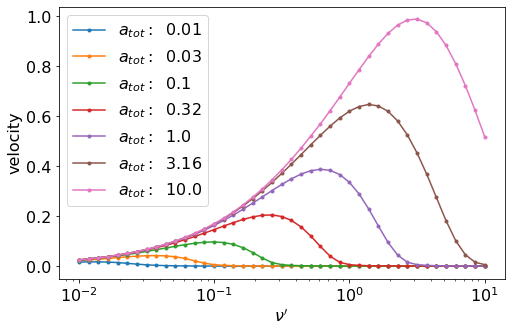

In [47]:
# plot v vs. nu
for i in [0,7,14,21,28,35,42]:
    plot(nus, vs[i],'.-', label = r"$a_{tot}:$  " + str(round(a0s[i],2)))

#title(r"$Steady\ State\ Velocity\ vs. \nu'$")
legend(fontsize = 16)
xlabel(r"$\nu'$", fontsize = 16)
ylabel("velocity", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
xscale('log')

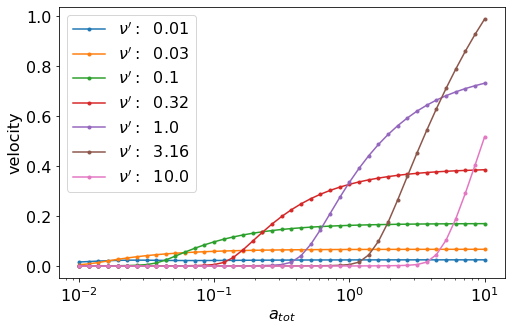

In [50]:
# plot v vs. a0 
for i in [0,7,14,21,28,35,42]:
    plot(a0s, vs.T[i], '.-', label = r"$\nu':$  " + str(round(nus[i],2)))
    #plot(a0s[:5],a0s[:5])

legend(fontsize = 16)
xlabel(r"$a_{tot}$", fontsize = 16)
ylabel("velocity", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
xscale('log')

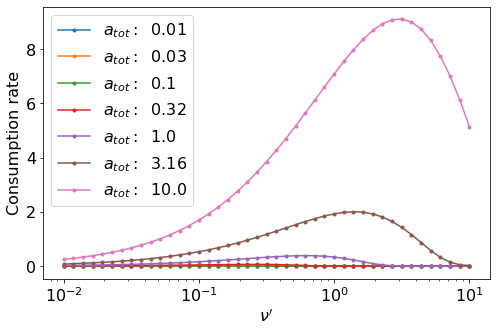

In [52]:
#plot burn rate vs. nu
for i in [0,7,14,21,28,35,42]:
    plot(nus, burnt[i], '.-', label = r"$a_{tot}:$  " + str(round(a0s[i],2)))


legend(fontsize = 16)
xlabel(r"$\nu'$", fontsize = 16)
ylabel("Consumption rate", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
xscale('log')

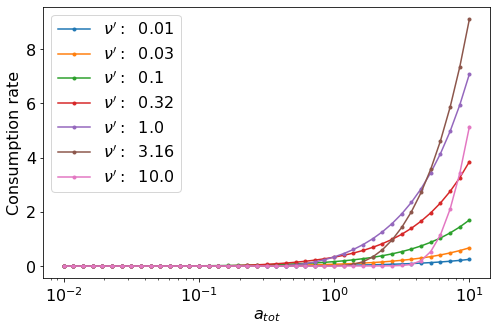

In [54]:
#plot burn rate vs. a0
for i in [0,7,14,21,28,35,42]:
    plot(a0s, burnt.T[i], '.-', label = r"$\nu':$  " + str(round(nus[i],2)))

legend(fontsize = 16)
xlabel(r"$a_{tot}$", fontsize = 16)
ylabel("Consumption rate", fontsize = 16)
xticks(fontsize = 16)
yticks(fontsize = 16)
xscale('log')

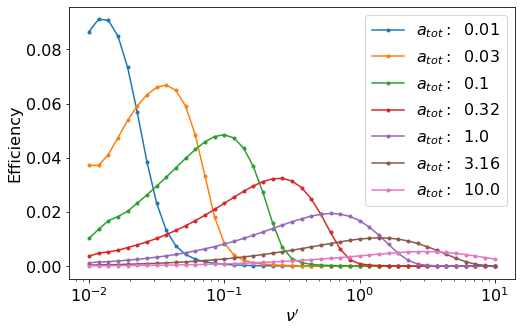

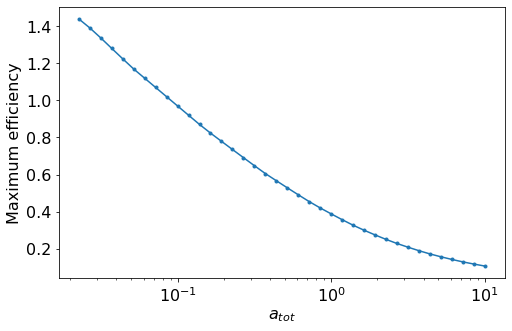

In [63]:
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:grey","tab:olive","tab:cyan", ]

#plot efficiency vs. nu
ct = 0
factor = 1/20
for i in [0,7,14,21,28,35,42]:
    plot(nus, factor*vs[i]**2/burnt[i],".-", label = r"$a_{tot}:$  " + str(round(a0s[i],2)),c=colors[ct])
    #plot(nus,vs[i]/a0s[i],"+",c=colors[ct])
    ct+=1
etamax = []
for i in range(5,a0_n):
    etamax.append(max(vs[i]**2/burnt[i]))

#title(r"Relative Efficiency vs. $\nu'$")
legend(fontsize = 16)
xlabel(r"$\nu'$",fontsize = 16)
ylabel("Efficiency",fontsize = 16)
yticks(fontsize = 16)
xticks(fontsize = 16)
xscale('log')
show()
plot(a0s[5:],etamax,".-")
xlabel(r"$a_{tot}$",fontsize = 16)
ylabel("Maximum efficiency",fontsize = 16)
yticks(fontsize = 16)
xticks(fontsize = 16)
xscale('log')
show()

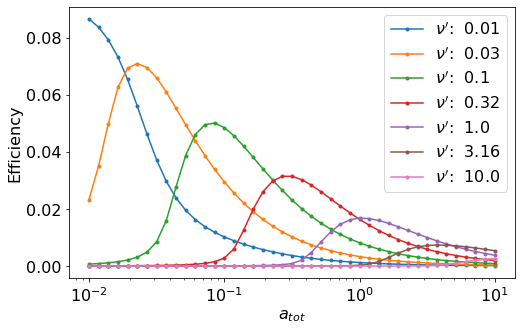

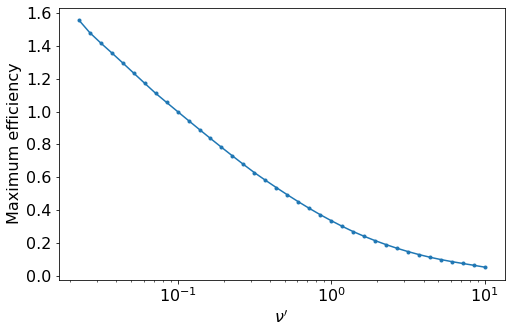

In [64]:
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:grey","tab:olive","tab:cyan", "tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown"]

#plot efficiency vs. a0
ct = 0
for i in [0,7,14,21,28,35,42]:
    plot(a0s, factor*vs.T[i]**2/burnt.T[i],".-", label = r"$\nu'$:  " + str(round(nus[i],2)),c=colors[ct])
    #plot(a0s,vs.T[i]/a0s,"+",c=colors[ct])
    ct += 1
etamax = []
for i in range(5,nu_n):
    etamax.append(max(vs.T[i]**2/burnt.T[i]))
#title(r"Relative Efficiency vs. $a_{tot}$")
legend(fontsize = 16)
xlabel(r"$a_{tot}$",fontsize = 16)
ylabel("Efficiency",fontsize = 16)
yticks(fontsize = 16)
xticks(fontsize = 16)
xscale('log')
show()
plot(nus[5:],etamax,".-")
xlabel(r"$\nu'$",fontsize = 16)
ylabel("Maximum efficiency",fontsize = 16)
yticks(fontsize = 16)
xticks(fontsize = 16)
xscale('log')
show()

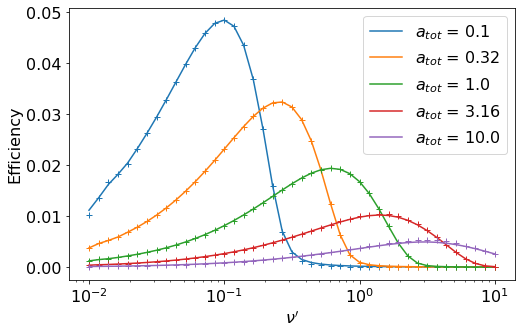

In [119]:
colors1 = ["silver", "lightpink", "lightcoral", "peachpuff", "bisque", "lawngreen", "cyan", "skyblue", "blueviolet", "violet"]
colors2 = ["dimgrey", "crimson", "darkred", "peru", "darkorange","forestgreen", "darkturquoise", "deepskyblue", "indigo", "magenta"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:grey","tab:olive","tab:cyan", "tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown"]

#plot efficiency vs. nu
ct = 0
figure(figsize(8,5))
for i in [14,21,28,35,42]:
    
    plot(nus,0.05*vs[i]/a0s[i],c=colors[ct], label = r"$a_{tot}$ = "   + str(round(a0s[i],2)))
    plot(nus, 0.05*(vs[i]**2/burnt[i]),"+",c=colors[ct])

    ct+=1

legend(fontsize = 16)
xlabel(r"$\nu'$",fontsize = 16)
ylabel("Efficiency",fontsize = 16)
yticks(fontsize = 16)
xticks(fontsize = 16)
xscale('log')


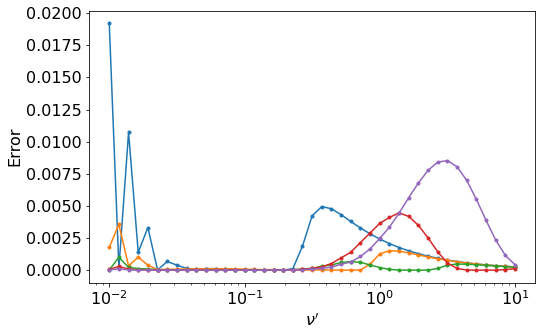

In [116]:
for i in [14,21,28,35,42]:
    actual = vs[i]**2/burnt[i]
    diff = vs[i]/a0s[i]-actual
    '''for j in range(len(diff)):
        if diff[j] < 1e-2:
            diff[j] = 0.0'''
    plot(a0s,abs(diff),".-", label = r"$a_{tot}$ = "   + str(round(a0s[i],2)))
    #plot(a0s,actual)
    xscale("log")
    #yscale("log")
    ylabel("Error",fontsize = 16)
    xlabel(r"$\nu'$",fontsize = 16)
    yticks(fontsize = 16)
    xticks(fontsize = 16)

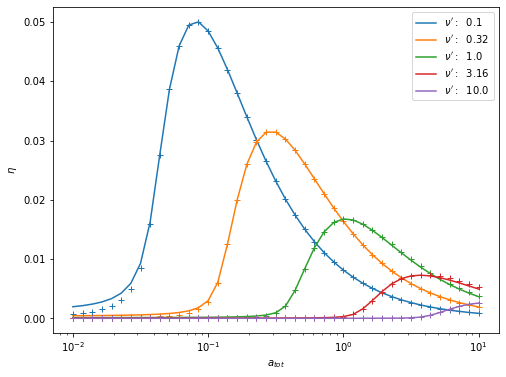

In [118]:
colors1 = ["silver", "lightpink", "lightcoral", "peachpuff", "bisque", "lawngreen", "cyan", "skyblue", "blueviolet", "violet"]
colors2 = ["dimgrey", "crimson", "darkred", "peru", "darkorange","forestgreen", "darkturquoise", "deepskyblue", "indigo", "magenta"]
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:grey","tab:olive","tab:cyan", "tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown"]

#plot efficiency vs. a0
ct = 0
figure(figsize(8,6))
for i in [14,21,28,35,42]:
    
    plot(a0s,0.05*vs.T[i]/a0s,c=colors[ct], label = r"$\nu':$  " + str(round(nus[i],2)))
    plot(a0s,0.05* vs.T[i]**2/burnt.T[i],"+",c=colors[ct])

    ct+=1

legend()
xlabel(r"$a_{tot}$")
ylabel(r"$\eta$")
xscale('log')
